In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

<body>
    <h1>Problem - 1: Getting Started with Data Exploration</h1>
    <h2>Exercises</h2>

<section>
    <h3>1. Data Exploration and Understanding</h3>
    <h4>Dataset Overview</h4>
<ol>
            <li>Load the dataset and display the first 10 rows.</li>
            <li>Identify the number of rows and columns in the dataset.</li>
            <li>List all the columns and their data types.</li>
        </ol>

In [88]:
#Loading the data
data = pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/WHR-2024-5CS037.csv")
print("Dataset Overview :\n")

print("First 10 data of each coloumn from given data set:-\n")
print(tabulate(data.head(10), headers='keys', tablefmt='pretty'))

print("\n\nTotal rows and columns in the data set: ")
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

print("\n\nList of all the columns and their data types:\n")
print(data.dtypes)
print("--------------------------------------------\n")

Dataset Overview :

First 10 data of each coloumn from given data set:-

+---+--------------+-------+--------------------+----------------+-------------------------+------------------------------+------------+---------------------------+---------------------+
|   | Country name | score | Log GDP per capita | Social support | Healthy life expectancy | Freedom to make life choices | Generosity | Perceptions of corruption | Dystopia + residual |
+---+--------------+-------+--------------------+----------------+-------------------------+------------------------------+------------+---------------------------+---------------------+
| 0 |   Finland    | 7.741 |       1.844        |     1.572      |          0.695          |            0.859             |   0.142    |           0.546           |        2.082        |
| 1 |   Denmark    | 7.583 |       1.908        |      1.52      |          0.699          |            0.823             |   0.204    |           0.548           |        1.881  



<h4><li>Basic Statistics</h4></li>
        <ol>
            <li>Calculate the mean, median, and standard deviation for the <code>Score</code> column.</li>
            <li>Identify the country with the highest and lowest happiness scores.</li>
        </ol>

In [37]:
print("\nBasic Statistics:\n")
print("The mean, median and standard deviation for the Score column are:-\n")
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()
print(f"Mean Score: {mean_score}\nMedian Score: {median_score}\nStandard Deviation: {std_score}\n")

print("\nThe country with the highest and lowest happiness scores:-\n")
highest_country = data.loc[data['score'].idxmax(), 'Country name']
lowest_country = data.loc[data['score'].idxmin(), 'Country name']
print(f"Highest Happiness Score: {highest_country}\nLowest Happiness Score: {lowest_country}")
print("--------------------------------------------\n\n")


Basic Statistics:

The mean, median and standard deviation for the Score column are:-

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation: 1.1707165099442995


The country with the highest and lowest happiness scores:-

Highest Happiness Score: Finland
Lowest Happiness Score: Afghanistan
--------------------------------------------




<h4><li>Missing Values</li></h4>
        <ol>
            <li>Check if there are any missing values in the dataset. If so, display the total count for each column.</li>
        </ol>
        <h4><li>Filtering and Sorting</li></h4>
        <ol>
            <li>Filter the dataset to show only the countries with a <code>Score</code> greater than 7.5.</li>
            <li>For the filtered dataset - Sort the dataset by <code>GDP per Capita</code> in descending order and display the top 10 rows.</li>
        </ol>
</section>

In [43]:
# Display the total count of missing values for each column in the dataset
print("Total count of missing value for each column:\n")
print(data.isnull().sum())

Total count of missing value for each column:

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [54]:
# Filter and sort: Top countries with score > 7.5, sorted by Log GDP per capita
filtered_data = data[data['score'] > 7.5]
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("Countries with score > 7.5 are :- \n")
print(sorted_data[['Country name', 'Log GDP per capita', 'score']])


Countries with score > 7.5 are :- 

  Country name  Log GDP per capita  score
1      Denmark               1.908  7.583
2      Iceland               1.881  7.525
0      Finland               1.844  7.741


<section>
        <h4><li>Adding New Columns</h4></li>
        <ol>
            <li>Create a new column called <code>Happiness Category</code> that categorizes countries into three categories based on their <code>Score</code>:
                <ul>
                    <li><b>Low:</b> <code>Score &lt; 4</code></li>
                    <li><b>Medium:</b> <code>4 ≤ Score ≤ 6</code></li>
                    <li><b>High:</b> <code>Score &gt; 6</code></li>
                </ul>
            </li>
        </ol></section>

In [57]:
#Adding New Columns
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print(data[['Country name', 'Log GDP per capita', 'score']].head(5))

  Country name  Log GDP per capita  score
0      Finland               1.844  7.741
1      Denmark               1.908  7.583
2      Iceland               1.881  7.525
3       Sweden               1.878  7.344
4       Israel               1.803  7.341


<section>
        <h3>2. Data Visualizations</h3>
        <ol>
            <li><b>Bar Plot:</b> Plot the top 10 happiest countries by <code>Score</code> using a bar chart.</li>
            <li><b>Line Plot:</b> Plot the top 10 unhappiest countries by <code>Score</code> using a line chart.</li>
            <li>Plot a histogram for the <code>Score</code> column to show its distribution and also interpret.</li>
            <li><b>Scatter Plot:</b> Plot a scatter plot between <code>GDP per Capita</code> and <code>Score</code> to visualize their relationship.</li>
        </ol>
    </section>
</body>


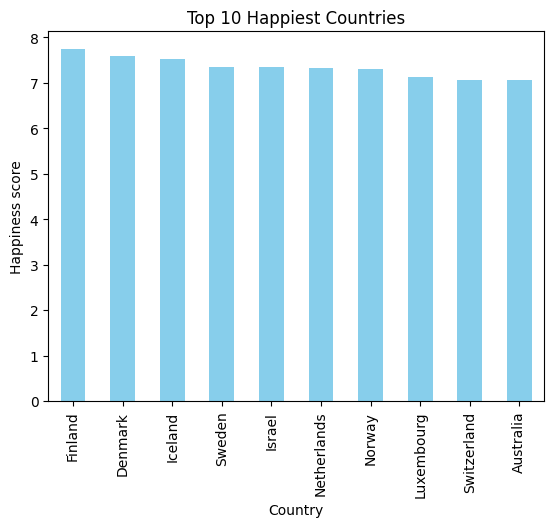

In [68]:
# Bar Plot - Top 10 Happiest Countries
happiest_countries = data.nlargest(10, 'score')
happiest_countries.plot(x='Country name', y='score', kind='bar', title='Top 10 Happiest Countries by Score', legend=False, color='skyblue' )
plt.xlabel('Country')
plt.ylabel('Happiness score')
plt.show()

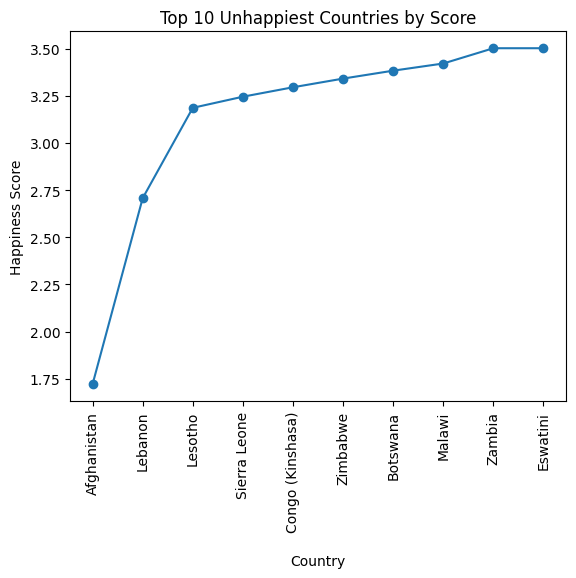

In [75]:
# Line Plot - Top 10 Unhappiest Countries
unhappiest_countries = data.nsmallest(10, 'score')
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o')
plt.title('Top 10 Unhappiest Countries by Score')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)
plt.xlabel('\nCountry')
plt.show()

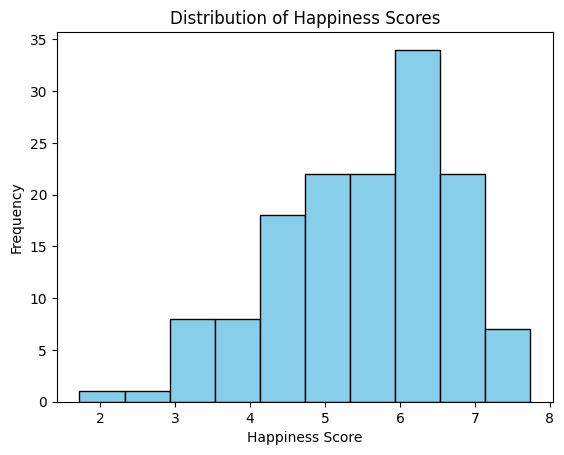

In [76]:
#Histogram - Distribution of Happiness Scores
plt.hist(data['score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

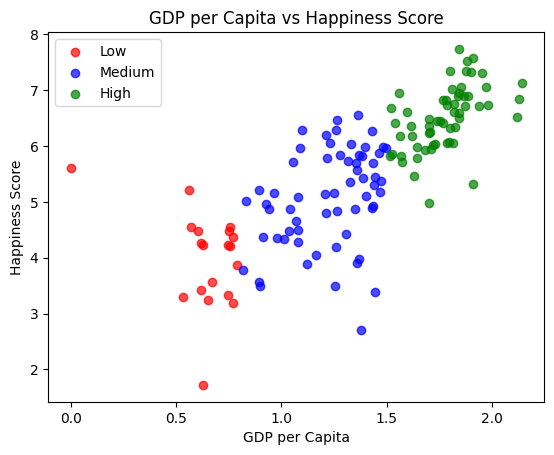

In [79]:
## Scatter Plot - GDP per Capita vs Score

low_gdp = data[data['Log GDP per capita'] < 0.8]
medium_gdp = data[(data['Log GDP per capita'] >= 0.8) & (data['Log GDP per capita'] < 1.5)]
high_gdp = data[data['Log GDP per capita'] >= 1.5]

plt.scatter(low_gdp['Log GDP per capita'], low_gdp['score'], alpha=0.7, c='red', label='Low')
plt.scatter(medium_gdp['Log GDP per capita'], medium_gdp['score'], alpha=0.7, c='blue', label='Medium')
plt.scatter(high_gdp['Log GDP per capita'], high_gdp['score'], alpha=0.7, c='green', label='High')

plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')

plt.legend()
plt.show()

<body>
    <h1>Problem - 2: Some Advanced Data Exploration Task</h1>
    
  <section>
        <h2>Task - 1: Setup Task - Preparing the South-Asia Dataset</h2>
        <ol>
            <li>Define the countries in South Asia with a list, for example:
          <pre>south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]</pre>
            </li>
            <li>Use the list from step 1 to filter the dataset (i.e., filter out matching dataset from the list).</li>
            <li>Save the filtered DataFrame as a separate CSV file for future use.</li>
        </ol>
    </section>
    

In [82]:
# Task 1: Preparing the South Asia Dataset
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_data = data[data['Country name'].isin(south_asian_countries)]
south_asia_data.to_csv('South_Asia_Data.csv', index=False)
print("\nDataset of south asian counties is saved.\n")


Dataset of south asian counties is saved.



<h2>Task - 2: Composite Score Ranking</h2>
        <ol>
            <li>
                Using the South Asia DataFrame, create a new column called <b>Composite Score</b> that combines the following metrics:
                <pre>Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy</pre>
            </li>
            <li>Rank the South Asian countries based on the Composite Score in descending order.</li>
            <li>Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.</li>
            <li>
                Discuss whether the rankings based on the Composite Score align with the original Score. Support your discussion with some visualization plot.
            </li>
        </ol>
    </section>

In [100]:
## Task 2: Composite Score Ranking
def calculate_composite_score(row):
    return 0.4 * row['Log GDP per capita'] + 0.3 * row['Social support'] + 0.3 * row['Healthy life expectancy']

south_asia_data['Composite Score'] = south_asia_data.apply(calculate_composite_score, axis=1)
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asia Composite Scores:\n", south_asia_data[['Country name', 'Composite Score']])


South Asia Composite Scores:
   Country name  Composite Score
1    Sri Lanka           1.0739
2        Nepal           0.8159
3        India           0.7874
4     Pakistan           0.7039
5   Bangladesh           0.6774
6  Afghanistan           0.3238


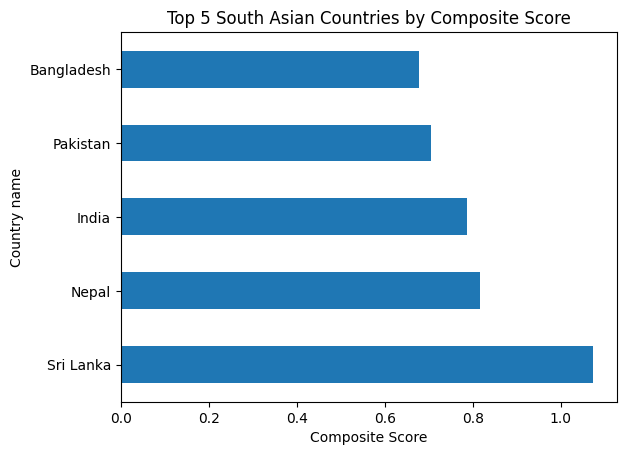

In [85]:
# Visualization - Top 5 Countries by Composite Score
top_5_composite = south_asia_data.head(5)
top_5_composite.plot(x='Country name', y='Composite Score', kind='barh', title='Top 5 South Asian Countries by Composite Score', legend=False)
plt.xlabel('Composite Score')
plt.show()

<section>
        <h2>Task - 3: Outlier Detection</h2>
        <ol>
            <li>Identify outlier countries in South Asia based on their Score and GDP per Capita.</li>
            <li>Define outliers using the <b>1.5 × IQR rule</b>.</li>
            <li>
                Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
            </li>
            <li>Discuss the characteristics of these outliers and their potential impact on regional averages.</li>
        </ol>
    </section>
    


In [107]:
# Task 3: Outlier Detection

for column in ['score', 'Log GDP per capita']:
    Q1 = south_asia_data[column].quantile(0.25)
    Q3 = south_asia_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    south_asia_data[f'{column} Outlier'] = ~south_asia_data[column].between(lower_bound, upper_bound)

    outliers = south_asia_data[south_asia_data[f'{column} Outlier']]
    print(f"\nOutliers in {column}:")
    print(outliers[['Country name', column]].to_string(index=False))


Outliers in score:
Country name  score
 Afghanistan  1.721

Outliers in Log GDP per capita:
Country name  Log GDP per capita
 Afghanistan               0.628


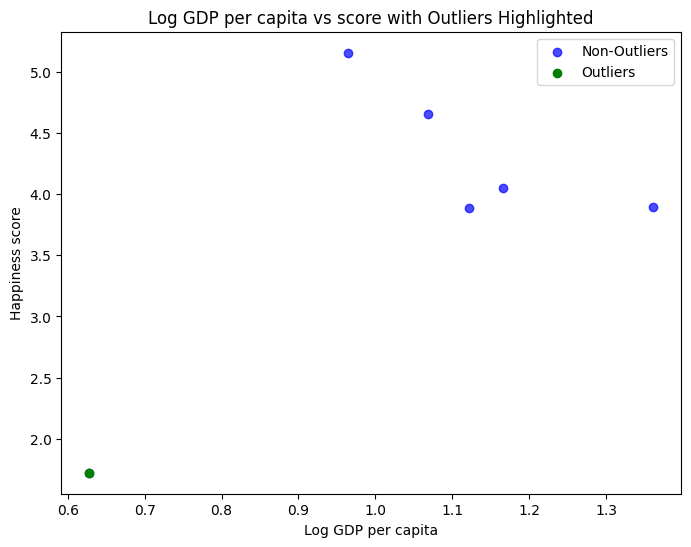

In [111]:
# Scatter Plot highlighting outliers
plt.figure(figsize=(8, 6))
plt.scatter(south_asia_data['Log GDP per capita'], south_asia_data['score'], alpha=0.7, c='blue', label='Non-Outliers')
outliers = south_asia_data[south_asia_data['score Outlier'] | south_asia_data['Log GDP per capita Outlier']]
plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='green', label='Outliers')
plt.title('Log GDP per capita vs score with Outliers Highlighted')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

<section>
        <h2>Task - 4: Exploring Trends Across Metrics</h2>
        <ol>
            <li>
                Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
                (<b>Pearson correlation</b>) with the Score for South Asian countries.
            </li>
            <li>Create scatter plots with trendlines for these metrics against the Score.</li>
            <li>
                Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.
            </li>
        </ol>
    </section>
  


Correlation between Freedom to make life choices and happiness score is: 0.8005185224163315


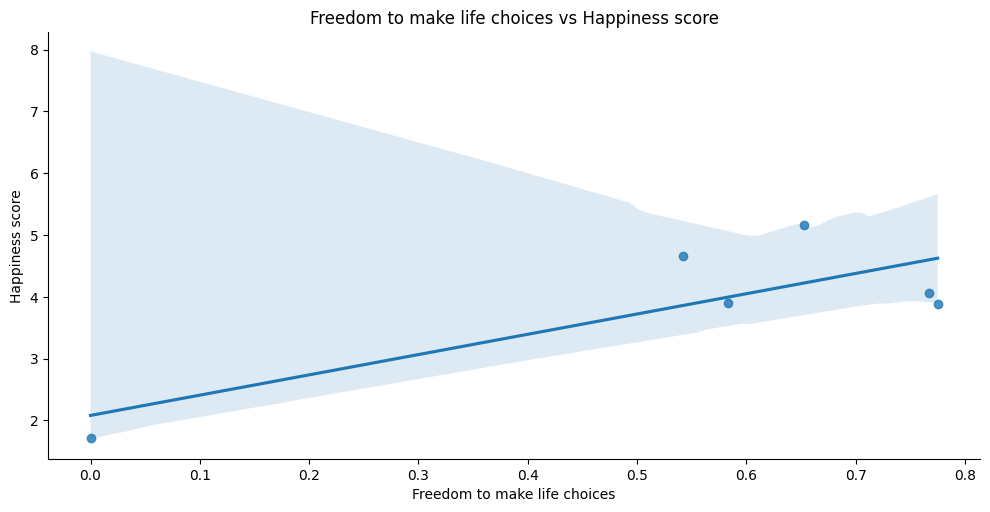

Correlation between Generosity and happiness score is: 0.874512371253192


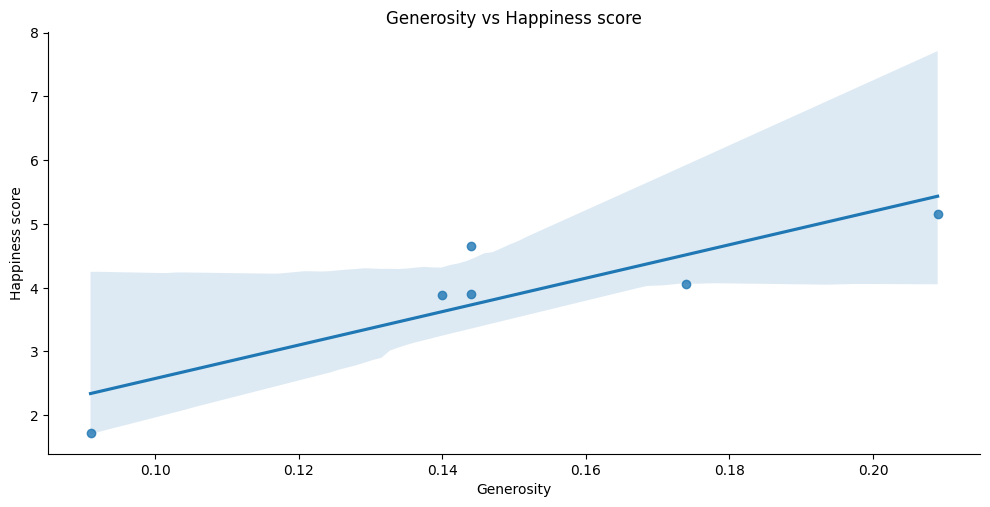

In [114]:
# Correlation and Scatter Plots
selected_metrics = ['Freedom to make life choices', 'Generosity']
for metric in selected_metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"Correlation between {metric} and happiness score is: {correlation}")
    sns.lmplot(x=metric, y='score', data=south_asia_data, aspect=2, height=5)
    plt.title(f'{metric} vs Happiness score')
    plt.xlabel(metric)
    plt.ylabel('Happiness score')
    plt.show()

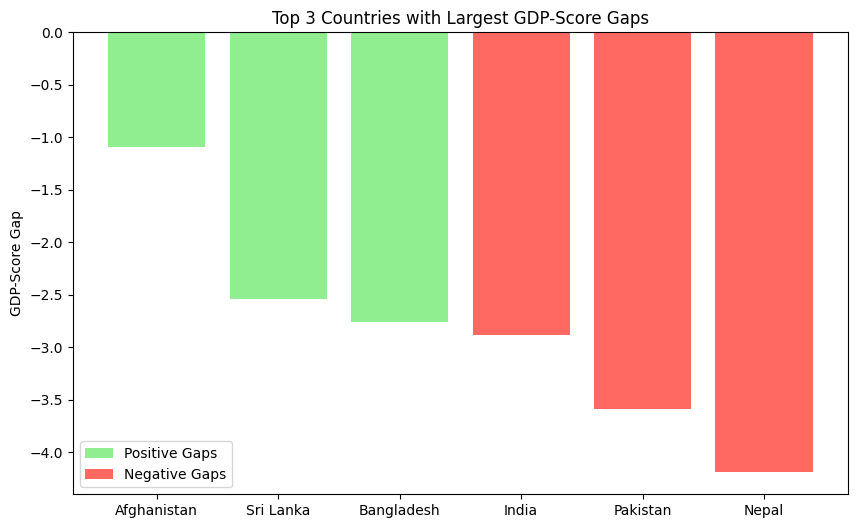

In [130]:
# Bar Chart - Largest Positive and Negative Gaps
plt.figure(figsize=(10, 6))
top_positive_gap = ranked_gap.head(3)
top_negative_gap = ranked_gap.tail(3)
plt.bar(top_positive_gap['Country name'], top_positive_gap['GDP-Score Gap'], color='lightgreen', label='Positive Gaps')
plt.bar(top_negative_gap['Country name'], top_negative_gap['GDP-Score Gap'], color='#FF6961', label='Negative Gaps')
plt.title('Top 3 Countries with Largest GDP-Score Gaps')
plt.ylabel('GDP-Score Gap')
plt.legend()
plt.show()

<section>
        <h2>Task - 5: Gap Analysis</h2>
        <ol>
            <li>Add a new column, <b>GDP-Score Gap</b>, which is the difference between GDP per Capita and the Score for each South Asian country.</li>
            <li>Rank the South Asian countries by this gap in both ascending and descending order.</li>
            <li>
                Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
            </li>
            <li>
                Analyze the reasons behind these gaps and their implications for South Asian countries.
            </li>
        </ol>
    </section>

In [117]:
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']
ranked_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)
print("\nCountries ranked by GDP-Score Gap:\n", ranked_gap[['Country name', 'GDP-Score Gap']])
print("-------------------------------------------------\n\n\n\n")


Countries ranked by GDP-Score Gap:
   Country name  GDP-Score Gap
6  Afghanistan         -1.093
1    Sri Lanka         -2.537
5   Bangladesh         -2.764
3        India         -2.888
4     Pakistan         -3.588
2        Nepal         -4.193
-------------------------------------------------






<div>
    <h1>Problem - 3 - Comparative Analysis:</h1>
    <h2>Task - 1: Setup Task - Preparing the Middle Eastern Dataset</h2>
    <p>Tasks:</p>
    <ol>
        <li>Similar in Task - 1 of Problem 2 create a dataframe from Middle Eastern countries. For hint use the following list:</li>
        <pre>middle east countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]</pre>
    </ol>


In [133]:
print("Creating a dataframe from Middle Eastern countries.")
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = data[data['Country name'].isin(middle_eastern_countries)]
middle_east_data.to_csv('Middle_East_Data.csv', index=False)

Creating a dataframe from Middle Eastern countries.


<h3>Complete the following task:</h3>
    <h4>Descriptive Statistics:</h4>
            <ul>
                <li>Calculate the mean and standard deviation of the score for both South Asia and the Middle East.</li>
                <li>Which region has higher happiness Scores on average?</li>
            </ul>
        </li>

In [148]:
#Task 1: Descriptive Statistics
mean_south_asia = south_asia_data['score'].mean()
mean_middle_east = middle_east_data['score'].mean()
std_south_asia = south_asia_data['score'].std()
std_middle_east = middle_east_data['score'].std()

print(f"Mean Happiness Score :-\nSouth Asia: {mean_south_asia} and  Middle East: {mean_middle_east}\n")
print(f"Standard Deviation :-\nSouth Asia: {std_south_asia} and Middle East: {std_middle_east}")
print("------------------------------------------------------------------------------------\n\n")

Mean Happiness Score :-
South Asia: 3.895666666666667 and  Middle East: 5.412100000000001

Standard Deviation :-
South Asia: 1.1770690152521501 and Middle East: 1.5662011684327144
------------------------------------------------------------------------------------




<h4>Top and Bottom Performers:</h4>
            <ul>
                <li>Identify the top 3 and bottom 3 countries in each region based on the score.</li>
                <li>Plot bar charts comparing these charts.</li>
            </ul>
        </li>

In [150]:
# Task 2: Top and Bottom Performers
top_3_sa = south_asia_data.nlargest(3, 'score')
bottom_3_sa = south_asia_data.nsmallest(3, 'score')
top_3_me = middle_east_data.nlargest(3, 'score')
bottom_3_me = middle_east_data.nsmallest(3, 'score')
print("\nTop 3 Countries by Happiness Score - South Asia:\n", top_3_sa[['Country name', 'score']])
print("\nBottom 3 Countries by Happiness Score - South Asia:\n", bottom_3_sa[['Country name', 'score']])
print("\nTop 3 Countries by Happiness Score - Middle East:\n", top_3_me[['Country name', 'score']])
print("\nBottom 3 Countries by Happiness Score - Middle East:\n", bottom_3_me[['Country name', 'score']])


Top 3 Countries by Happiness Score - South Asia:
   Country name  score
2        Nepal  5.158
4     Pakistan  4.657
3        India  4.054

Bottom 3 Countries by Happiness Score - South Asia:
   Country name  score
6  Afghanistan  1.721
5   Bangladesh  3.886
1    Sri Lanka  3.898

Top 3 Countries by Happiness Score - Middle East:
             Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Countries by Happiness Score - Middle East:
     Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


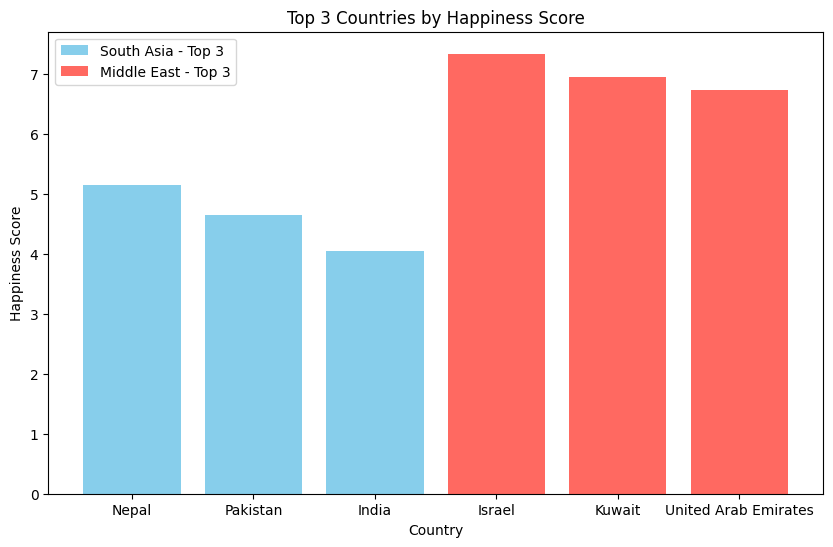

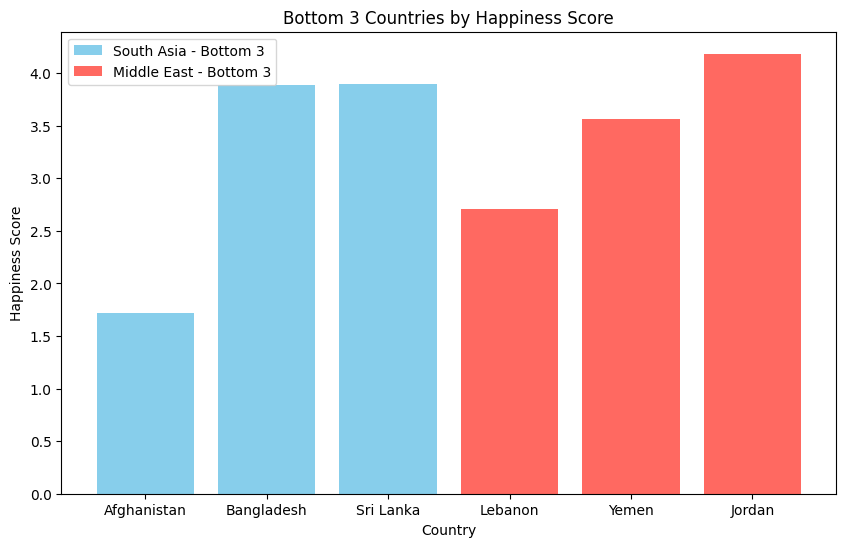

In [154]:
# Bar Charts
plt.figure(figsize=(10, 6))
plt.bar(top_3_sa['Country name'], top_3_sa['score'], color='skyblue', label='South Asia - Top 3')
plt.bar(top_3_me['Country name'], top_3_me['score'], color='#FF6961', label='Middle East - Top 3')
plt.title('Top 3 Countries by Happiness Score')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.legend()
plt.show()
print("\n\n")
plt.figure(figsize=(10, 6))
plt.bar(bottom_3_sa['Country name'], bottom_3_sa['score'], color='skyblue', label='South Asia - Bottom 3')
plt.bar(bottom_3_me['Country name'], bottom_3_me['score'], color='#FF6961', label='Middle East - Bottom 3')
plt.title('Bottom 3 Countries by Happiness Score')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.legend()
plt.show()

<h4>Metric Comparisons:</h4>
            <ul>
                <li>Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.</li>
                <li>Which metrics show the largest disparity between the two regions?</li>
            </ul>
        

Average Log GDP per capita :-
South Asia: 1.0518 and Middle East: 1.4963


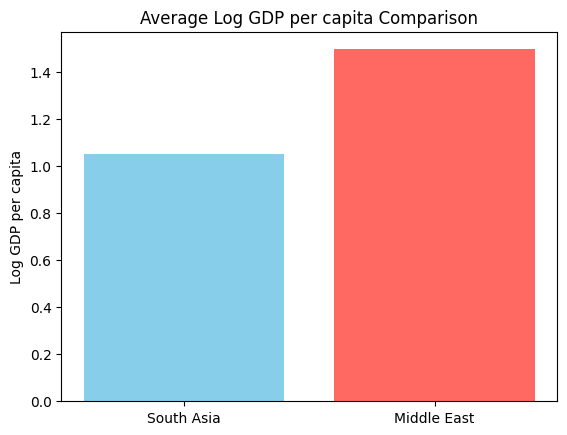

Average Social support :-
South Asia: 0.6118 and Middle East: 1.1528


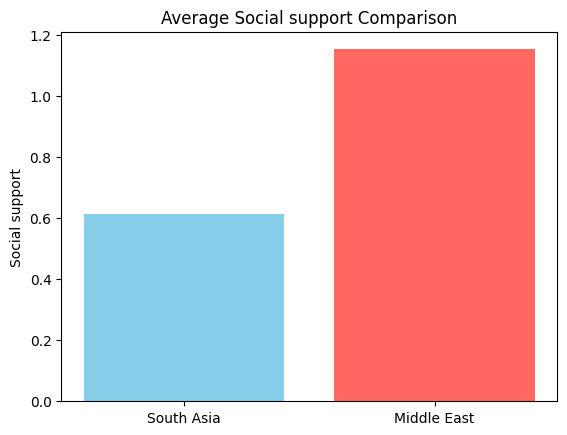

Average Healthy life expectancy :-
South Asia: 0.4203 and Middle East: 0.5541


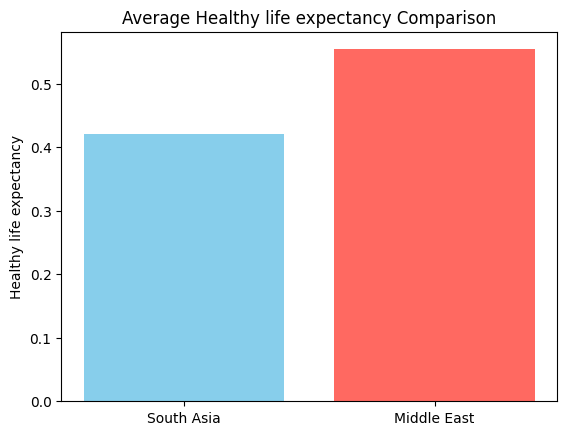

In [163]:
#Task 3: Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
for metric in metrics:
    asian_mean = south_asia_data[metric].mean()
    middleEast_mean = middle_east_data[metric].mean()
    print(f"Average {metric} :-\nSouth Asia: {asian_mean:.4f} and Middle East: {middleEast_mean:.4f}")

    #Bar chart
    plt.bar(['South Asia', 'Middle East'], [asian_mean, middleEast_mean], color=['skyblue', '#FF6961'])
    plt.title(f'Average {metric} Comparison')
    plt.ylabel(metric)
    plt.show()


<h4>Happiness Disparity:</h4>
            <ul>
                <li>Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.</li>
                <li>Which region has greater variability in happiness?</li>
            </ul>

In [162]:
#Task 4: Happiness Disparity
range_asian = south_asia_data['score'].max() - south_asia_data['score'].min()
range_middleEast = middle_east_data['score'].max() - middle_east_data['score'].min()
cv_asian = std_south_asia / mean_south_asia
cv_middleEast = std_middle_east / mean_middle_east

print(f"Happiness Range :-\nSouth Asia: {range_asian:.4f} and Middle East: {range_middleEast:.4f}\n\n")
print(f"Coefficient of Variation :-\nSouth Asia: {cv_asian:.4f} and Middle East: {cv_middleEast:.4f}")

Happiness Range :-
South Asia: 3.4370 and Middle East: 4.6340


Coefficient of Variation :-
South Asia: 0.3021 and Middle East: 0.2894



<h4>Correlation Analysis:</h4>
            <ul>
                <li>Analyze the correlation of Score with other metrics Freedom to Make Life Choices and Generosity within each region.</li>
                <li>Create scatter plots to visualize and interpret the relationships.</li>
            </ul>

Correlation between Freedom to make life choices and Score :-
South Asia: 0.8005185224163315, Middle East: 0.8632202433827543



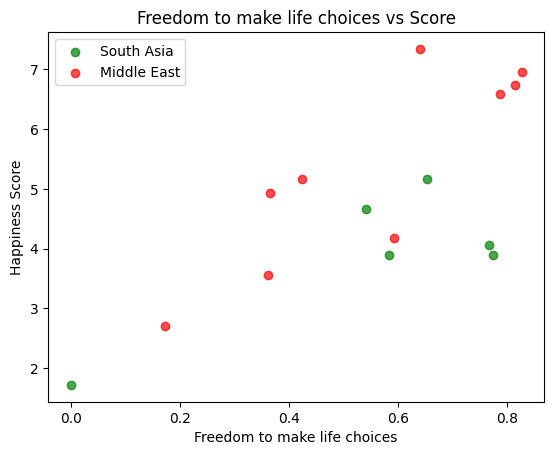

Correlation between Generosity and Score :-
South Asia: 0.874512371253192, Middle East: 0.6275236536964182



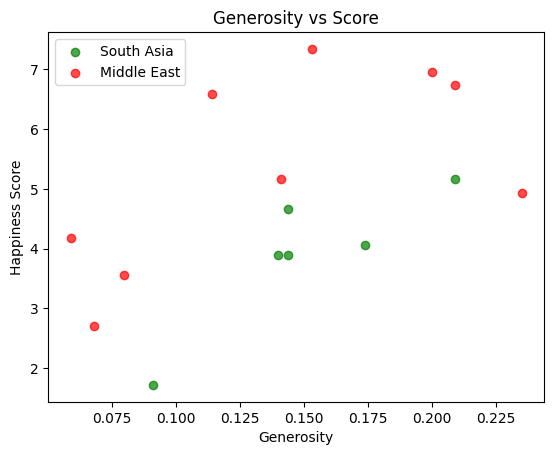

In [176]:
# Task 5: Correlation Analysis
selected_metrics = ['Freedom to make life choices', 'Generosity']
for metric in selected_metrics:
    corr_asian = south_asia_data[metric].corr(south_asia_data['score'])
    corr_middleEast = middle_east_data[metric].corr(middle_east_data['score'])
    print(f"Correlation between {metric} and Score :-\nSouth Asia: {corr_asian}, Middle East: {corr_middleEast}\n")

    plt.scatter(south_asia_data[metric], south_asia_data['score'], alpha=0.7, label='South Asia', color='green')
    plt.scatter(middle_east_data[metric], middle_east_data['score'], alpha=0.7, label='Middle East', color='red')
    plt.title(f'{metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()

<h4>Outlier Detection:</h4>
            <ul>
                <li>Identify outlier countries in both regions based on Score and GDP per Capita.</li>
                <li>Plot these outliers and discuss their implications.</li>
            </ul>
        </li>
        

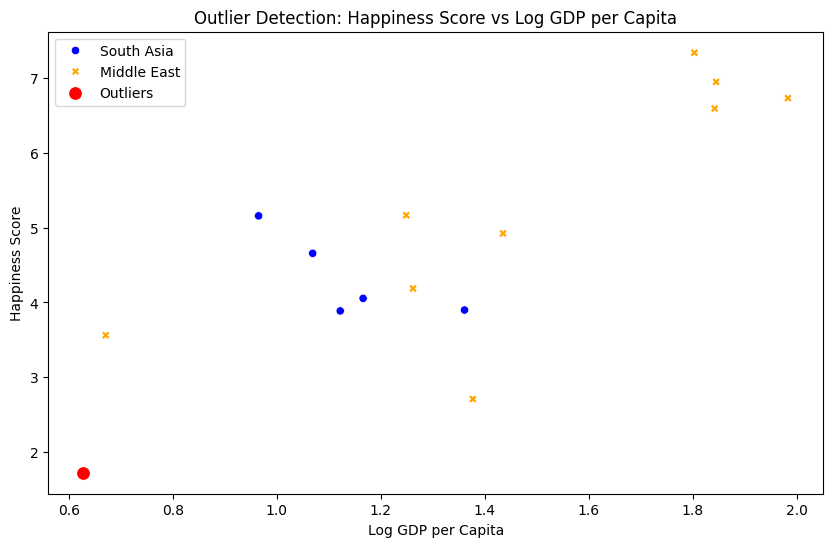

Outlier Countries Based on Score and GDP per Capita:
  Country name  score  Log GDP per capita      Region
6  Afghanistan  1.721               0.628  South Asia


In [194]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_score_south_asia = detect_outliers(south_asia_data, 'score')
outliers_gdp_south_asia = detect_outliers(south_asia_data, 'Log GDP per capita')

outliers_score_middle_east = detect_outliers(middle_east_data, 'score')
outliers_gdp_middle_east = detect_outliers(middle_east_data, 'Log GDP per capita')

outliers_combined = pd.concat([
    outliers_score_south_asia,
    outliers_gdp_south_asia,
    outliers_score_middle_east,
    outliers_gdp_middle_east
]).drop_duplicates()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_data,
    x='Log GDP per capita',
    y='score',
    hue='Region',
    style='Region',
    palette=['blue', 'orange']
)
sns.scatterplot(
    data=outliers_combined,
    x='Log GDP per capita',
    y='score',
    color='red',
    label='Outliers',
    s=100
)
plt.title('Outlier Detection: Happiness Score vs Log GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

print("Outlier Countries Based on Score and GDP per Capita:")
print(outliers_combined[['Country name', 'score', 'Log GDP per capita', 'Region']])


<h4>Visualization:</h4>
            <ul>
                <li>Create boxplots comparing the distribution of Score between South Asia and the Middle East.</li>
                <li>Interpret the key differences in distribution shapes, medians, and outliers.</li>
            </ul>
        </li>
    </ol>
</div>

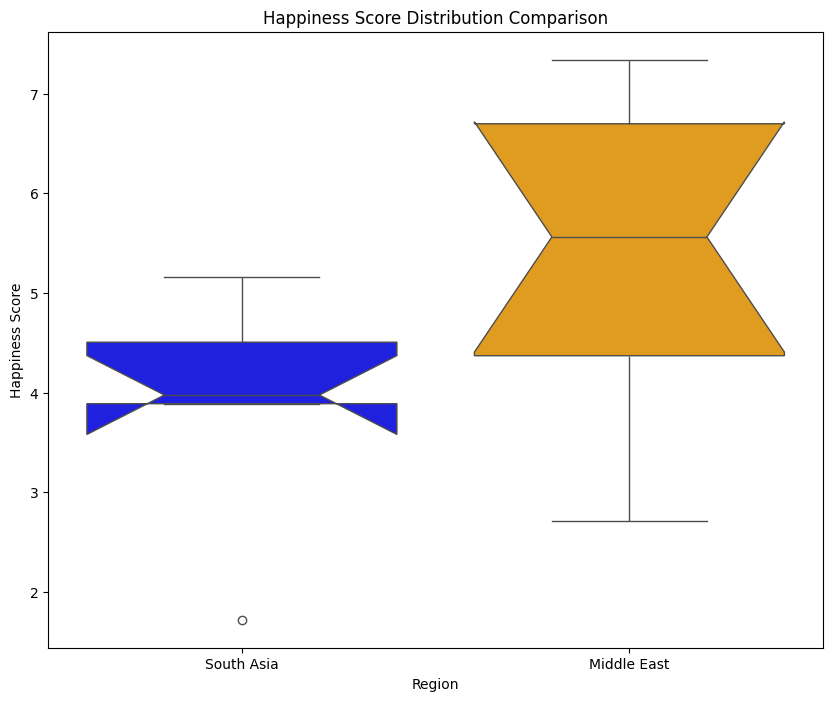

In [191]:
plt.figure(figsize=(10, 8))
sns.boxplot(
    x='Region',
    y='score',
    data=combined_data,
    hue='Region',
    palette=['blue', 'orange'],
    notch=True,
    dodge=False
)

plt.title('Happiness Score Distribution Comparison')
plt.ylabel('Happiness Score')
plt.legend([], [], frameon=False)
plt.show()
